    **Attribute Information:**
1. id
2. model_f5
3. title_f1	
4. price_f9	
5. city_f4	
6. model_spec_f6	
7. body_f7	
8. engine_f8	
9. csv_transmission_f9	
10. drive_f10	
11. steer_f11	
12. paint_f12	
13. customs_f13	
14. run_f15	
15. vin_f18	description_f7	
16. visits_f8	
17. pict_f10	
18. av_prise_f17


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import random
import glob
random.seed(42)

tqdm.pandas()

In [2]:
# Connect to the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# KZ dataset
# root = "/content/drive/My Drive/Car_price_prediction"
root = r"C:/Users/NBD/PycharmProjects/pricing_cars"

# df_name = 'kolesa_avto_legkovi_1k.csv'
cleaned_df_files = sorted(glob.glob(root + "/datasets/cleaned/*.csv"))

print(cleaned_df_files)


['C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_1k+_2110.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_1k.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_unique_1.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_unique_2.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_unique_saved_0.csv']


In [3]:

# Load the cleaned datasets
df_new = pd.DataFrame()
for cleaned_df_name in cleaned_df_files:
    df = pd.read_csv(cleaned_df_name)
    df_new = pd.concat([df_new, df])
print('Joint dataset shape: ', df_new.shape)    

Joint dataset shape:  (160458, 19)


In [4]:
# Drop duplicated IDs
len_dp = sum(df_new.duplicated(['id']))
df_duplicated_id = df_new.duplicated(['id'], keep='last').sort_values()
print(df_duplicated_id.head())
if len_dp > 0:
    print("Number of duplicated ID = ", len_dp, ' from ', df.shape[0])
    df_new = df_new[~df_new.duplicated(['id'], keep='last')]
print('Joint dataset new shape: ', df_new.shape)

47466    False
74205    False
74206    False
74207    False
74208    False
dtype: bool
Number of duplicated ID =  19758  from  19103
Joint dataset new shape:  (140700, 19)


In [5]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140700 entries, 0 to 19102
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   140700 non-null  object 
 1   model_f5             140700 non-null  object 
 2   city_f4              140700 non-null  object 
 3   body_f7              140663 non-null  object 
 4   csv_transmission_f9  140700 non-null  object 
 5   drive_f10            140662 non-null  object 
 6   paint_f12            116563 non-null  object 
 7   year_f1              140700 non-null  int64  
 8   price_f9             140700 non-null  float64
 9   run_f15              88192 non-null   float64
 10  steer_left_f11       140700 non-null  int64  
 11  steer_right_f21      140700 non-null  int64  
 12  cleared_f13          140700 non-null  int64  
 13  not_cleared_f23      140700 non-null  int64  
 14  engine_volume_f8     140033 non-null  float64
 15  engine_type_f28   

In [6]:
print(df_new.columns)

Index(['id', 'model_f5', 'city_f4', 'body_f7', 'csv_transmission_f9',
       'drive_f10', 'paint_f12', 'year_f1', 'price_f9', 'run_f15',
       'steer_left_f11', 'steer_right_f21', 'cleared_f13', 'not_cleared_f23',
       'engine_volume_f8', 'engine_type_f28', 'options_f7', 'visits_f8',
       'av_prise_f17'],
      dtype='object')


In [7]:
# Save Joint cleaned dataset

# joint_df_name = 'joint_KZ_4.csv'
# df_new.to_csv(root + '/datasets/' + joint_df_name, index=False)

In [8]:
# # Load Joint cleaned dataset
#
# joint_df_name = 'joint_KZ_last.csv'
# df_new = pd.read_csv(root + '/datasets/' + joint_df_name)

In [9]:
# print(df_new['model_f5'].value_counts())
df_model = df_new[['city_f4', 'year_f1', 'price_f9']].loc[df_new.model_f5 == 'Toyota Land Cruiser'].sort_values(['city_f4', 'year_f1'])#.groupby(['model_f5'])
print(df_model.head(50))

                       city_f4  year_f1    price_f9
15997  Акколь (Аккольский р-н)       15  17500000.0
6375                     Аксай       28   4200000.0
7176                     Актау        0  55000000.0
2215                     Актау        1  55000000.0
10013                    Актау        1  57500000.0
13177                    Актау        1  60000000.0
6115                     Актау        2  45500000.0
3330                     Актау        2  48500000.0
1290                     Актау        2  72000000.0
11241                    Актау        2  48800000.0
14968                    Актау        7  34000000.0
15062                    Актау        7  35800000.0
262                      Актау        8  30000000.0
16616                    Актау        8  18800000.0
6866                     Актау        9  24500000.0
579                      Актау       10  23000000.0
3341                     Актау       10  25000000.0
11006                    Актау       10  24000000.0
15231       

**Categorical features processing**

In [10]:
categorical = df_new.dtypes[df_new.dtypes == "object"].index[1:]
print('Categorical features (without "id"): ', categorical)

Categorical features (without "id"):  Index(['model_f5', 'city_f4', 'body_f7', 'csv_transmission_f9', 'drive_f10',
       'paint_f12', 'engine_type_f28'],
      dtype='object')


In [11]:
#Lets use One-Hot Encoding to convert categorical columns.
df_num = df_new
for ctgr in categorical:
    dummies = pd.get_dummies(df_new[ctgr])
    df_num = pd.concat([df_num,dummies],axis=1)
    #Let's drop the old columns.
    df_num = df_num.drop([ctgr],axis=1)

df_num = df_num.drop(['id'],axis=1)
# df_num['av_prise_f17'] = df_new['av_prise_f17']
print(df_num.info())
# print(df_num.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140700 entries, 0 to 19102
Columns: 2068 entries, year_f1 to дизель
dtypes: float64(4), int64(7), uint8(2057)
memory usage: 288.9 MB
None


In [12]:
clmn_list = df_num.columns.to_list()
print('New features names: ', clmn_list)

New features names:  ['year_f1', 'price_f9', 'run_f15', 'steer_left_f11', 'steer_right_f21', 'cleared_f13', 'not_cleared_f23', 'engine_volume_f8', 'options_f7', 'visits_f8', 'av_prise_f17', 'Acura MDX', 'Acura RDX', 'Acura TL', 'Acura TLX', 'Alfa Romeo 145', 'Alfa Romeo 155', 'Alfa Romeo 156', 'Alfa Romeo 164', 'Alfa Romeo Giulia', 'Alpina B4', 'Aro 24', 'Audi 100', 'Audi 200', 'Audi 80', 'Audi 90', 'Audi A3', 'Audi A4', 'Audi A4 allroad', 'Audi A5', 'Audi A6', 'Audi A6 allroad', 'Audi A7', 'Audi A8', 'Audi Cabriolet', 'Audi Coupe', 'Audi Q2L e-tron', 'Audi Q3', 'Audi Q3 Sportback', 'Audi Q5', 'Audi Q5 Sportback', 'Audi Q5 e-tron', 'Audi Q7', 'Audi Q8', 'Audi Quattro', 'Audi R8', 'Audi RS 6', 'Audi RS 7', 'Audi RS Q8', 'Audi S2', 'Audi S4', 'Audi S5', 'Audi S6', 'Audi S7', 'Audi S8', 'Audi SQ8', 'Audi TT', 'Audi V8', 'Audi e-tron', 'Audi e-tron GT', 'Audi e-tron Sportback', 'Avatr 11', 'BAIC BJ40 Plus', 'BAIC BJ80', 'BAIC Beijing X7', 'BAIC EC3', 'BAIC EU5', 'BMW', 'BMW 116', 'BMW 118'

**Null values processing**

In [13]:
# Check if there are any null values.
num_list =[[clmn, df_num[clmn].isnull().sum()] for clmn in clmn_list if df_num[clmn].isnull().sum() > 0]
print('Features with null values: ', num_list)

Features with null values:  [['run_f15', 52508], ['engine_volume_f8', 667], ['av_prise_f17', 21109]]


count    1.407000e+05
mean     1.696392e+05
std      1.120834e+05
min      1.000000e+00
25%      1.170000e+05
50%      1.696392e+05
75%      1.900000e+05
max      4.040000e+06
Name: run_f15, dtype: float64


array([[<AxesSubplot: title={'center': 'run_f15'}>]], dtype=object)

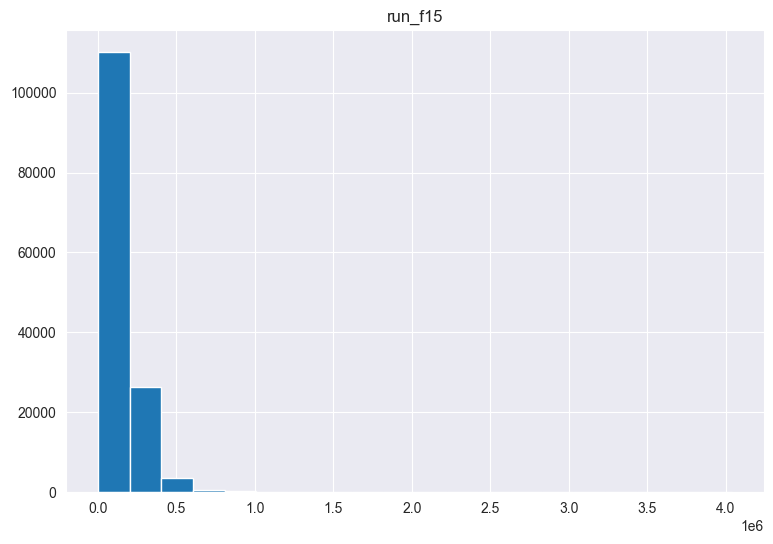

In [14]:
new_run = np.where(df_num["run_f15"].isnull(), # Logical check
                       df_num["run_f15"].mean(),                       # Value if check is true
                       df_num["run_f15"])     # Value if check is false
df_num["run_f15"] = new_run 
print(df_num["run_f15"].describe())
df_num.hist(column='run_f15',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

count    140700.000000
mean          2.254520
std           0.866949
min           0.100000
25%           1.600000
50%           2.000000
75%           2.500000
max           9.000000
Name: engine_volume_f8, dtype: float64


array([[<AxesSubplot: title={'center': 'engine_volume_f8'}>]],
      dtype=object)

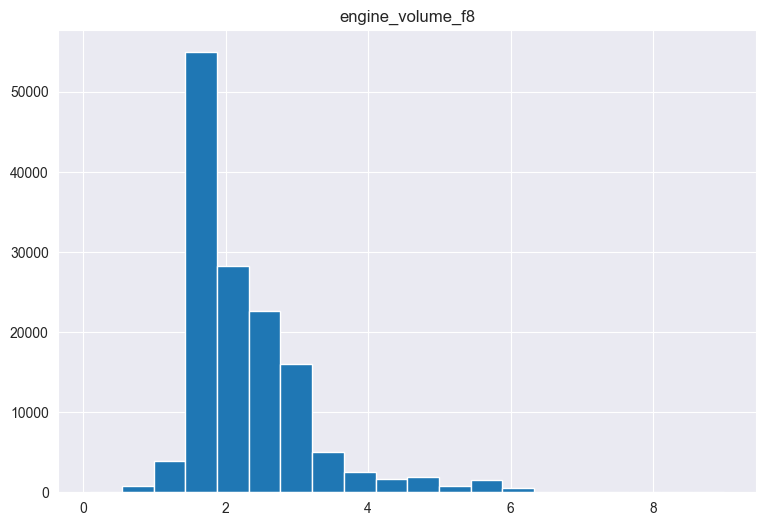

In [15]:
new_engine_volume = np.where(df_num["engine_volume_f8"].isnull(), # Logical check
                       df_num["engine_volume_f8"].mean(),                       # Value if check is true
                       df_num["engine_volume_f8"])     # Value if check is false
df_num["engine_volume_f8"] = new_engine_volume 
print(df_num["engine_volume_f8"].describe())
df_num.hist(column='engine_volume_f8',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

count    1.407000e+05
mean     6.951253e+06
std      1.008238e+07
min      2.357140e+05
25%      1.759758e+06
50%      4.551788e+06
75%      7.719393e+06
max      1.687500e+08
Name: av_prise_f17, dtype: float64


array([[<AxesSubplot: title={'center': 'av_prise_f17'}>]], dtype=object)

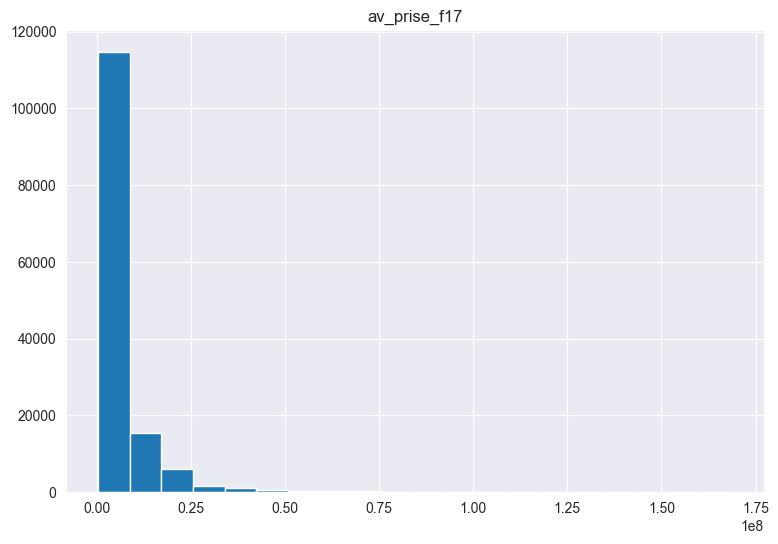

In [16]:
new_av_prise = np.where(df_num["av_prise_f17"].isnull(), # Logical check
                       df_num["price_f9"].mean(),             # Value if check is true
                       df_num["av_prise_f17"])     # Value if check is false
df_num["av_prise_f17"] = new_av_prise 
print(df_num["av_prise_f17"].describe())
df_num.hist(column='av_prise_f17',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

array([[<AxesSubplot: title={'center': 'price_f9'}>]], dtype=object)

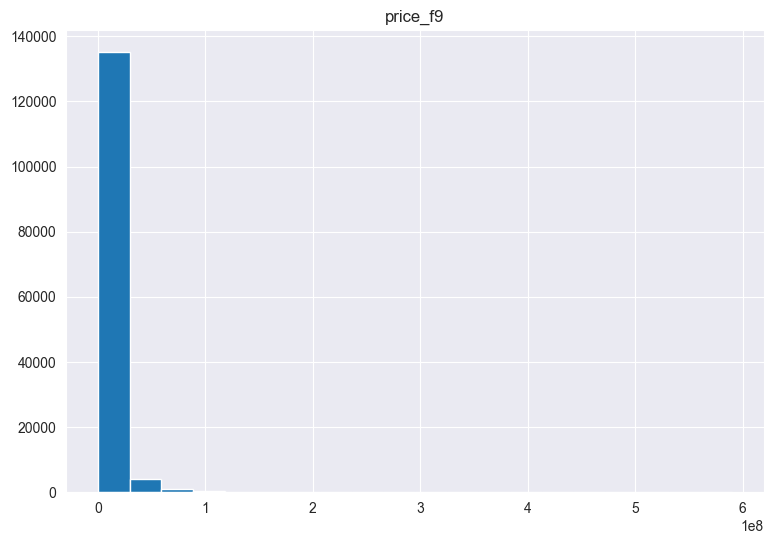

In [17]:
df_num.hist(column='price_f9',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

**1.Data Visualization** 


**1.1 Visualizing Numerical Continuous Features**


<AxesSubplot: ylabel='av_prise_f17'>

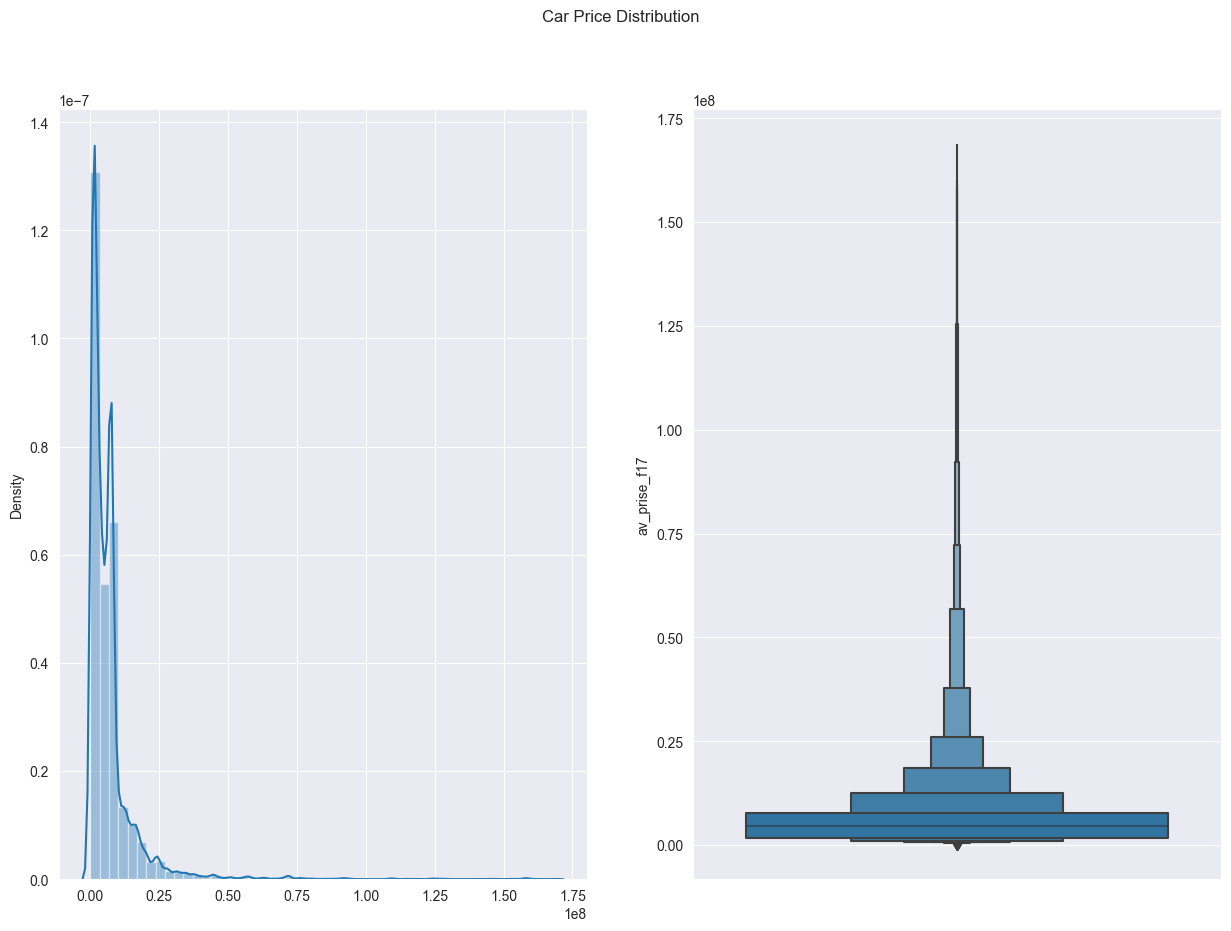

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle('Car Price Distribution')

plt.subplot(1,2,1)
sns.distplot(x=df_num.av_prise_f17)

plt.subplot(1,2,2)
sns.boxenplot(y=df_num.av_prise_f17)

In [19]:
print(df_num.price_f9.describe())

count    1.407000e+05
mean     7.719393e+06
std      1.313116e+07
min      1.000000e+04
25%      1.650000e+06
50%      3.700000e+06
75%      8.500000e+06
max      5.900000e+08
Name: price_f9, dtype: float64


1.   (75%) of our data are below 13,2M and (25%) is between 13,2M and 250M.
2.   Also (25%) of our data is between the min 10K and 2,2M.
3.   These insights show that our data has a high variance and a lot of outliers.






<AxesSubplot: xlabel='options_f7', ylabel='price_f9'>

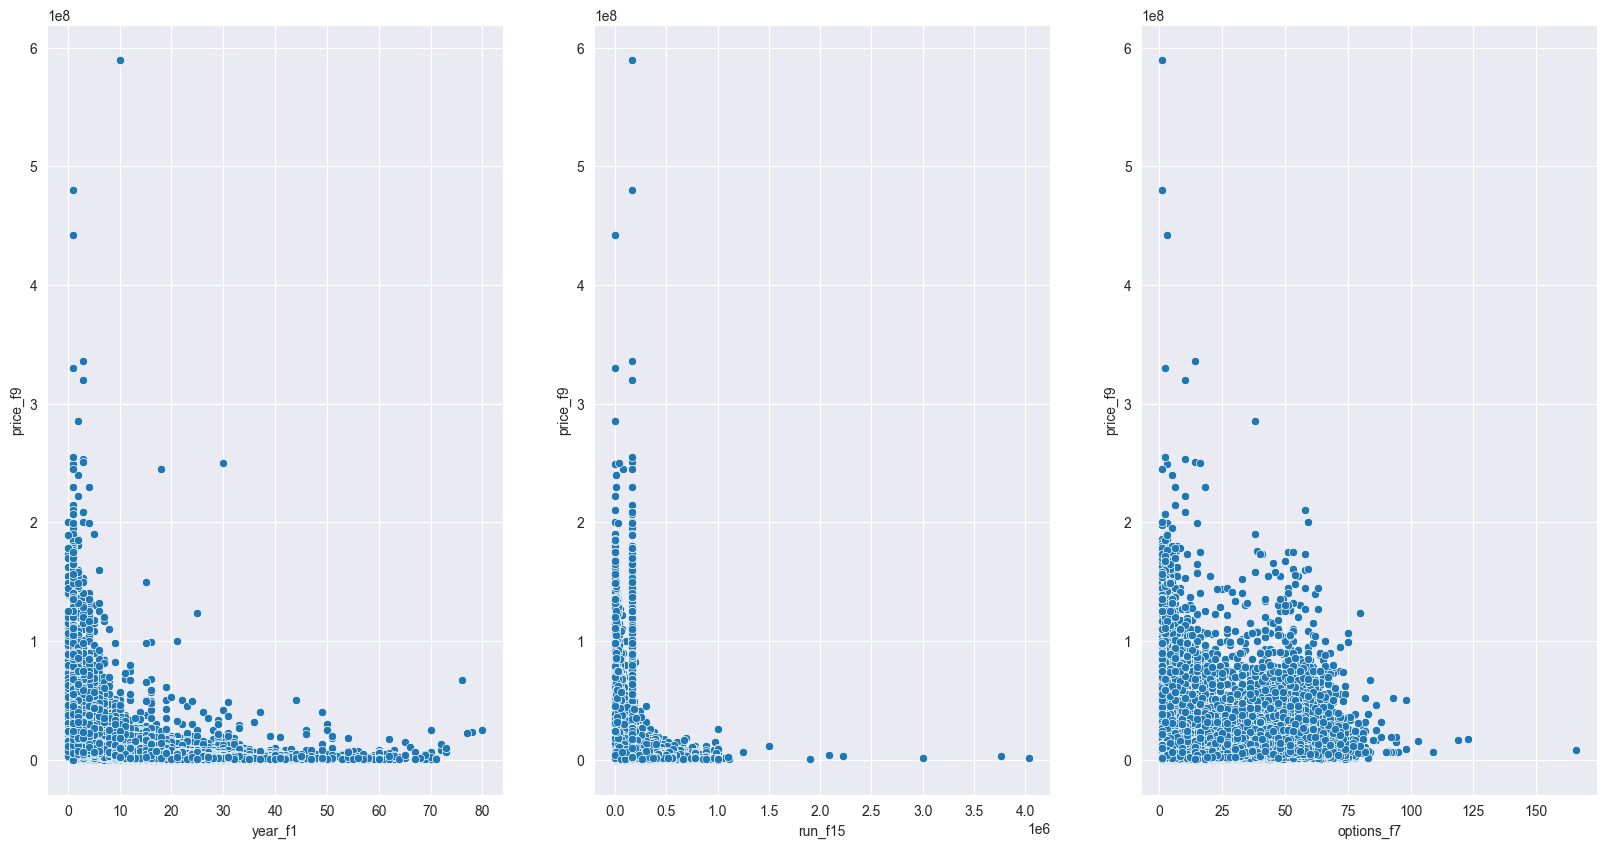

In [20]:
# Year, Mileage and Options vs Price
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x=df_num.year_f1,y=df_num.price_f9)

plt.subplot(1,3,2)
sns.scatterplot(x=df_num.run_f15,y=df_num.price_f9)

plt.subplot(1,3,3)
sns.scatterplot(x=df_num.options_f7,y=df_num.price_f9)

1.   Mileage seem to have a negative and year of issue a positive  correlation with price.
2.   Options doesn't show any trend.

Text(0.5, 1.0, 'Spread Plot')

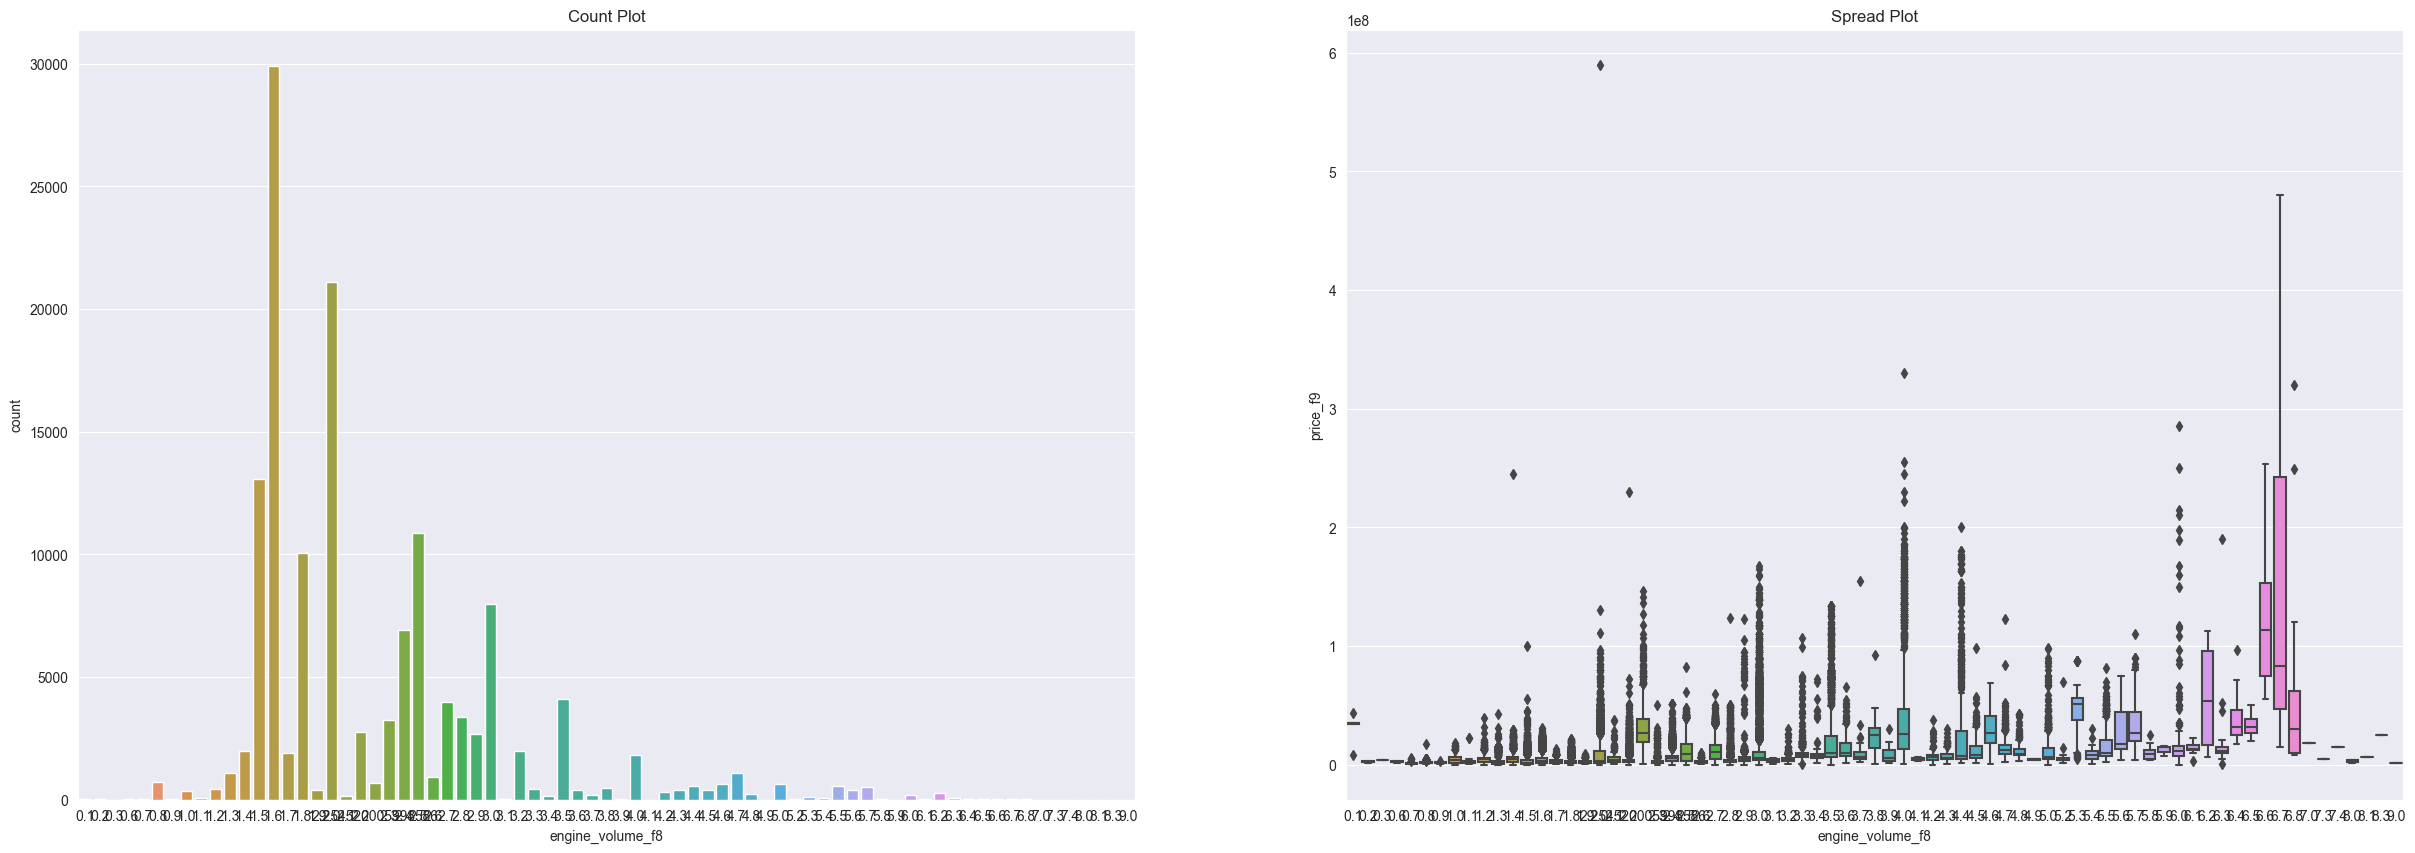

In [21]:
# Engine Volume vs Price
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x=df_num.engine_volume_f8)
plt.title('Count Plot')
plt.subplot(1,2,2)
sns.boxplot(x=df_num.engine_volume_f8,y=df_num.price_f9)
plt.title('Spread Plot')



1.   The most sold cars are with engine size:1, 1.5, 2  ????
2.   Cars with greater engine size cost more.  ????





**1.2 Visualizing Numerical Discrete Features**

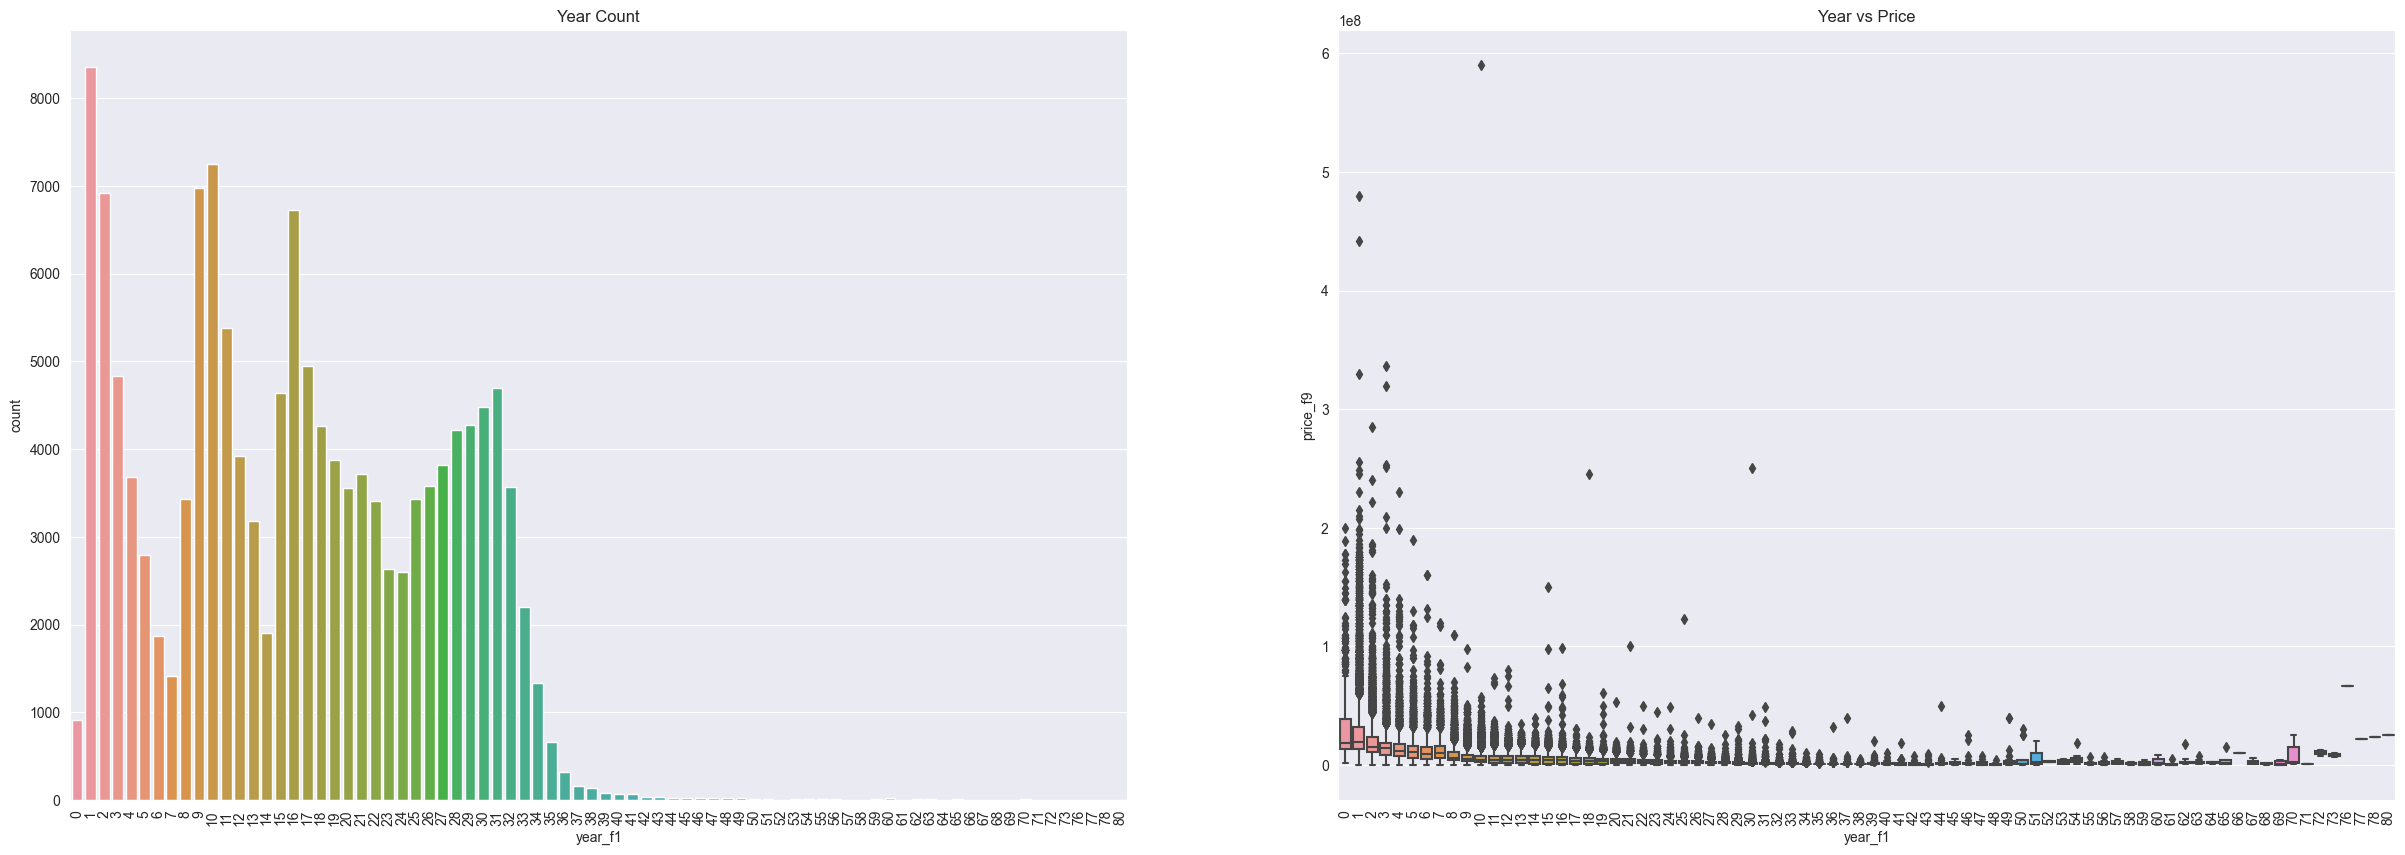

In [22]:
fig,axes = plt.subplots(1,2,figsize=(30,10))

# Year vs Price
sns.countplot(x=df_num.year_f1,ax=axes[0])
axes[0].set_title('Year Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df_num.year_f1,y=df_num.price_f9,ax=axes[1])
axes[1].set_title('Year vs Price')
axes[1].tick_params(axis='x',rotation=90)

1.   Most of the cars are between year 2013-2020. ????
2.   Also the cars with the highest price are the new ones. ???


**1.3 Visualizing Categorical Nominal Features**

In [23]:
# Car Model vs Price
# fig,axes = plt.subplots(2,1,figsize=(50,10))
#
# sns.countplot(x=df_new.model_f5,ax=axes[0])
# axes[0].set_title('Car Model Count')
# axes[0].tick_params(axis='x',rotation=90)
#
# sns.boxplot(x=df_new.model_f5,y=df_new.price_f9,ax=axes[1])
# axes[1].set_title('Car Model Price')
# axes[1].tick_params(axis='x',rotation=90)

1.   Most of the cars are:.
2.   Cars with the highest price are .
3.   The highest the price the lower the number of cars.


In [24]:
# City vs Price
# fig,axes = plt.subplots(2,1,figsize=(50,10))
#
# sns.countplot(x=df_new.city_f4,ax=axes[0])
# axes[0].set_title('City Count')
# axes[0].tick_params(axis='x',rotation=90)
#
# sns.boxplot(x=df_new.city_f4,y=df_new.price_f9,ax=axes[1])
# axes[1].set_title('City Price')
# axes[1].tick_params(axis='x',rotation=90)

1.   Most cars are sold in cities - 
2.   

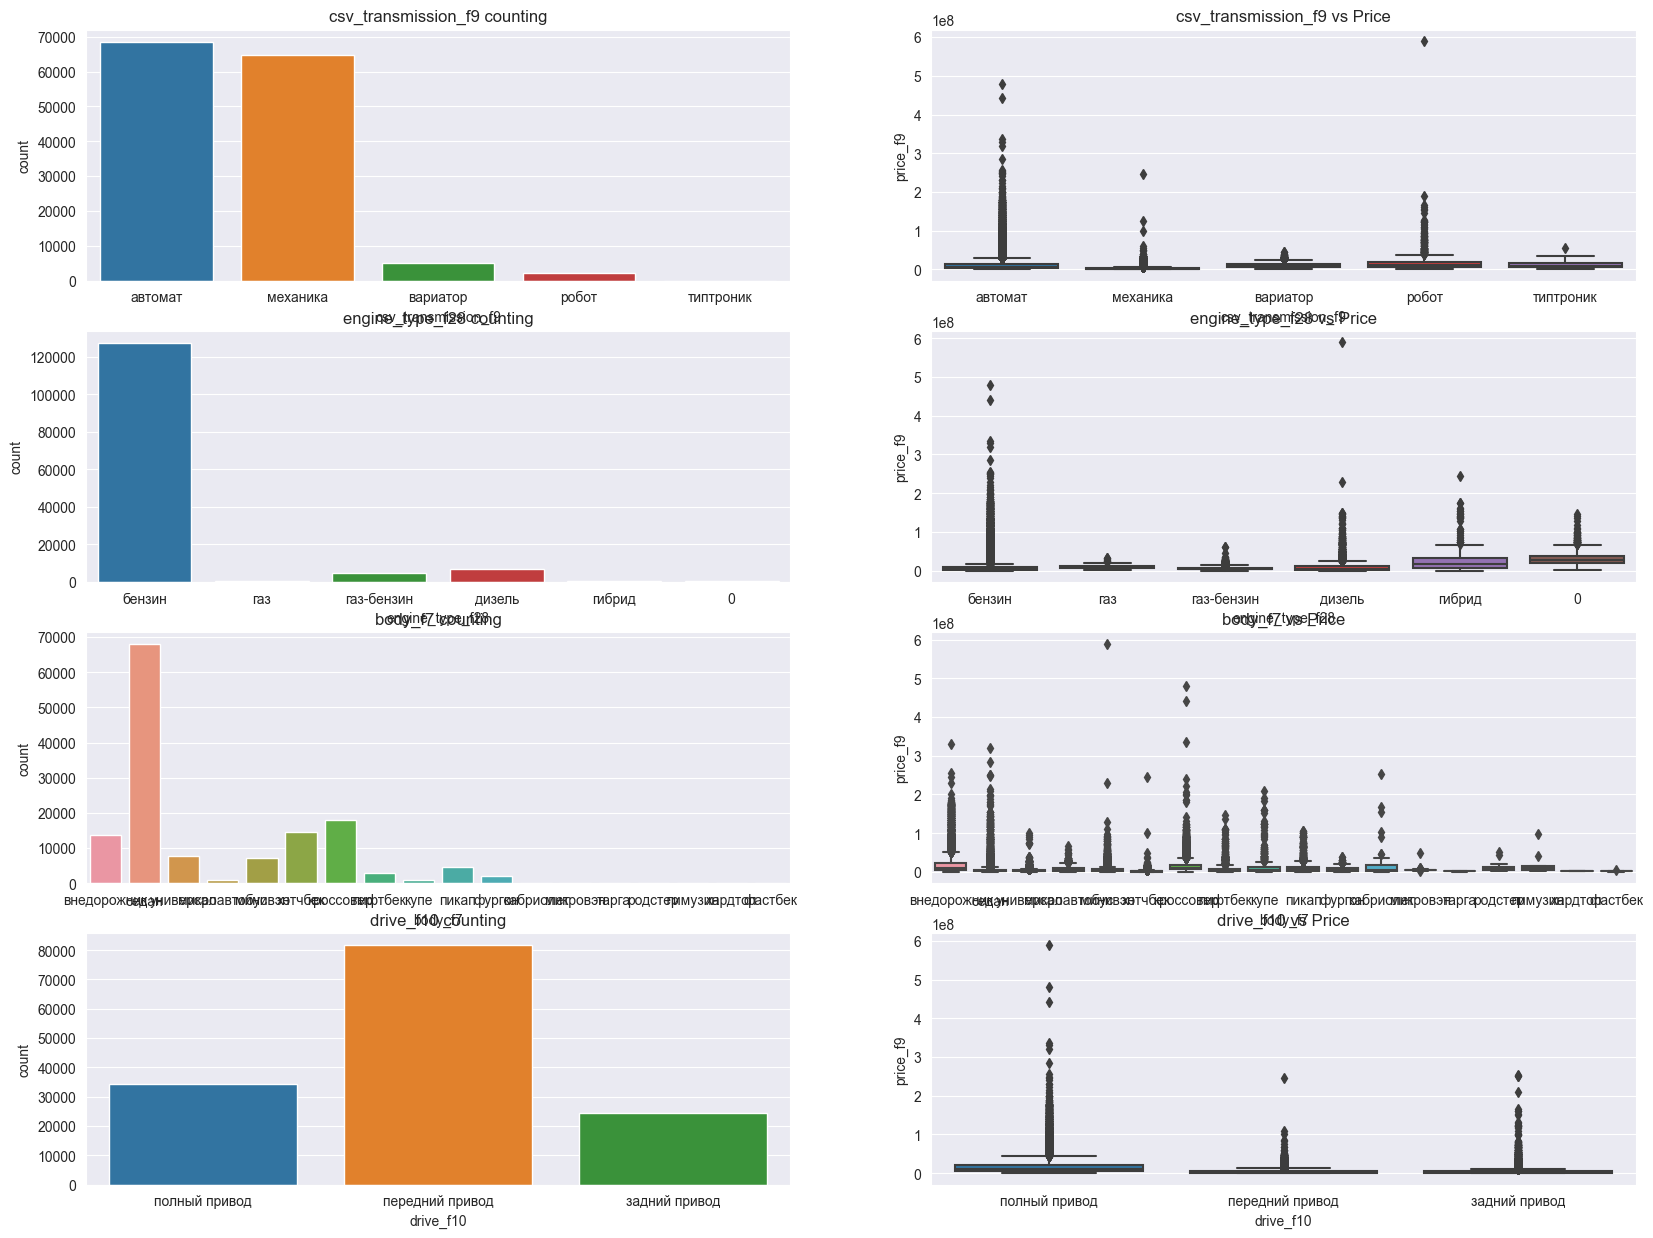

In [25]:
# Engine Type, Body, Transmission and Drive vs Price
def my_plot(x,y,nr):
    plt.subplot(4,2,nr)
    sns.countplot(x=df_new[x])
    plt.title(x+' counting')

    plt.subplot(4, 2, nr+1)
    sns.boxplot(x=df_new[x], y=df_new[y])
    plt.title(x + ' vs Price')


plt.figure(figsize=(20,15))
my_plot('csv_transmission_f9','price_f9',1)
my_plot('engine_type_f28','price_f9',3)
my_plot('body_f7','price_f9',5)
my_plot('drive_f10','price_f9',7)



1.   The most sold cars are those with automatic and manual transmission.
2.   Cars with the highest price are with Automatic transmissions.




---



1.   The most used fuel is petrol followed by diesel.
2.   Cars with Hybrid fueltype have the highest price.








In [26]:
df_num.head()

,year_f1,price_f9,run_f15,steer_left_f11,steer_right_f21,cleared_f13,not_cleared_f23,engine_volume_f8,options_f7,visits_f8,...,хамелеон,хамелеон металлик,черный,черный металлик,0,бензин,газ,газ-бензин,гибрид,дизель
0,18,8100000.0,169639.186752,1,0,1,0,3.5,24,64,...,0,0,0,1,0,1,0,0,0,0
1,29,1800000.0,169639.186752,0,1,1,0,1.5,14,34,...,0,0,0,0,0,1,0,0,0,0
2,19,5600000.0,230050.000000,1,0,1,0,3.0,23,129,...,0,0,0,1,0,1,0,0,0,0
3,19,1500000.0,300000.000000,1,0,0,1,1.6,5,88,...,0,0,0,0,0,1,0,0,0,0
4,23,3700000.0,169639.186752,1,0,1,0,3.0,12,126,...,0,0,0,0,0,1,0,0,0,0


**2.Outlier removal**

In [27]:
# ????????????????
# outlier_columns = ['price_f9', 'run_f15', 'engine_volume_f8', 'options_f7', 'visits_f8']
# for column in outlier_columns:
#    x = df_num[column].describe()
#    Q1 = x[4]
#    Q3 = x[6]
#    IQR = Q3-Q1
#    lower_bound = Q1-(1.5*IQR)
#    upper_bound = Q3+(1.5*IQR)
#    df = df[(df[column]>lower_bound)&(df[column]<upper_bound)]

In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140700 entries, 0 to 19102
Columns: 2068 entries, year_f1 to дизель
dtypes: float64(4), int64(7), uint8(2057)
memory usage: 288.9 MB


**3.Feature Engineering**

In [29]:
#Using (df) as a default name for our dataset.
# df = df2

In [30]:
#Index Reseting  ?????
# df = df.reset_index(drop=True)

In [31]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
# inputs = ['year_f1', 'price_f9', 'run_f15', 'engine_volume_f8', 'options_f7', 'visits_f8'] #av_prise_f17
inputs = ['year_f1', 'run_f15', 'engine_volume_f8', 'options_f7', 'visits_f8', 'av_prise_f17']
df_num[inputs] = mms.fit_transform(df_num[inputs])
df_num.head()

,year_f1,price_f9,run_f15,steer_left_f11,steer_right_f21,cleared_f13,not_cleared_f23,engine_volume_f8,options_f7,visits_f8,...,хамелеон,хамелеон металлик,черный,черный металлик,0,бензин,газ,газ-бензин,гибрид,дизель
0,0.2250,8100000.0,0.041990,1,0,1,0,0.382022,0.139394,0.000219,...,0,0,0,1,0,1,0,0,0,0
1,0.3625,1800000.0,0.041990,0,1,1,0,0.157303,0.078788,0.000116,...,0,0,0,0,0,1,0,0,0,0
2,0.2375,5600000.0,0.056943,1,0,1,0,0.325843,0.133333,0.000442,...,0,0,0,1,0,1,0,0,0,0
3,0.2375,1500000.0,0.074257,1,0,0,1,0.168539,0.024242,0.000301,...,0,0,0,0,0,1,0,0,0,0
4,0.2875,3700000.0,0.041990,1,0,1,0,0.325843,0.066667,0.000431,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# # So many features --> ??????????
# plt.figure(figsize = (30, 30))
# sns.heatmap(df_num.corr(), annot = True)
# plt.show()

In [33]:
# Save num cleaned dataset

# num_df_name = 'num_KZ_last.csv'
# df_num.to_csv(root + '/datasets/' + num_df_name, index=False)

In [34]:
# Load num cleaned dataset
#
# num_df_name = 'num_KZ_last.csv'
# df_num = pd.read_csv(root + '/datasets/' + num_df_name)

In [35]:
df_num_1 = df_num

In [36]:
df_num = df_num_1

In [37]:
# Correlation coefficients to 'price_f9' calculating and sorting

# correlations_data = df_num.corr()['price_f9'].sort_values()


In [39]:
# correlations_data.to_csv(r'datasets\corr_new_last.csv', encoding='utf-8-sig')
correlations_data = pd.read_csv(r'datasets\corr_new_last.csv',index_col=0, squeeze=True)
correlations_data

year_f1            -0.475518
механика           -0.356198
run_f15            -0.274990
передний привод    -0.262726
седан              -0.194881
                      ...   
автомат             0.321486
полный привод       0.398430
engine_volume_f8    0.404437
av_prise_f17        0.780270
price_f9            1.000000
Name: price_f9, Length: 2068, dtype: float64

In [ ]:
# correlations_data_old = pd.read_csv(r'datasets\corr_new.csv',index_col=0, squeeze=True)
# correlations_data_old

<AxesSubplot: >

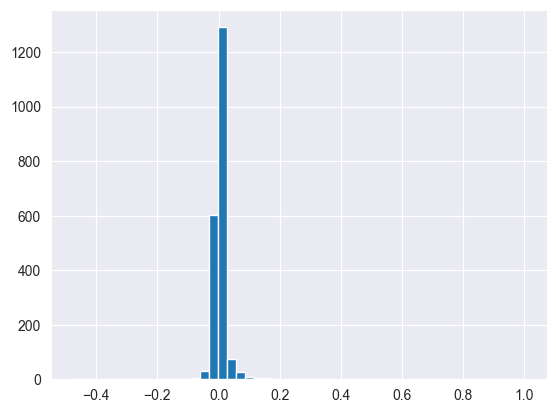

In [40]:
correlations_data.hist(
                  #  figsize=(9,6),   # Plot size
                   bins=50)         # Number of histogram bins

In [41]:
# Features which correlation coefficient > trashhold
trashhold = 0.05
corr_left =[[pos, correlations_data[pos]] for pos in correlations_data.index if np.abs(correlations_data[pos]) > trashhold]
for i in range(len(corr_left)): print(corr_left[i])

['year_f1', -0.4755179961002798]
['механика', -0.3561982643795818]
['run_f15', -0.2749897459547651]
['передний привод', -0.2627259639423474]
['седан', -0.194880509061646]
['хэтчбек', -0.1392562320706479]
['not_cleared_f23', -0.1228723151067965]
['задний привод', -0.1094918992272648]
['ВАЗ (Lada) 2114 (хэтчбек)', -0.0802475064479461]
['универсал', -0.0801126665275011]
['steer_right_f21', -0.0777195049512217]
['Volkswagen Passat', -0.070165673106371]
['серебристый металлик', -0.0669186561460677]
['Daewoo Nexia', -0.065664977362057]
['ВАЗ (Lada) 2115 (седан)', -0.0620385508762522]
['Volkswagen Golf', -0.0596908994209539]
['серебристый', -0.0585001624316914]
['ВАЗ (Lada) 2110 (седан)', -0.0583481333435677]
['ВАЗ (Lada) Priora 2170 (седан)', -0.0554845673025656]
['Opel Vectra', -0.053472730200201]
['зеленый металлик', -0.0533201126229091]
['бензин', -0.0519614985934839]
['ВАЗ (Lada) 2107', -0.0515330854701742]
['Rolls-Royce Phantom', 0.0514810957437489]
['visits_f8', 0.0519543585290784]
['H

In [42]:
# For calculation leave only features which correlation coefficient > trashhold
df_num_corr = pd.DataFrame(df_num, columns=[cor[0] for cor in corr_left])
print(df_num_corr.info())
# df_num_corr = df_num

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140700 entries, 0 to 19102
Data columns (total 83 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year_f1                         140700 non-null  float64
 1   механика                        140700 non-null  uint8  
 2   run_f15                         140700 non-null  float64
 3   передний привод                 140700 non-null  uint8  
 4   седан                           140700 non-null  uint8  
 5   хэтчбек                         140700 non-null  uint8  
 6   not_cleared_f23                 140700 non-null  int64  
 7   задний привод                   140700 non-null  uint8  
 8   ВАЗ (Lada) 2114 (хэтчбек)       140700 non-null  uint8  
 9   универсал                       140700 non-null  uint8  
 10  steer_right_f21                 140700 non-null  int64  
 11  Volkswagen Passat               140700 non-null  uint8  
 12  серебристый метал

In [ ]:
# df_num_corr = df_num

**4.Building the model**

In [43]:
x = df_num_corr.drop('price_f9',axis=1)
y= df_num_corr.price_f9

In [ ]:
# import gc as GC
# GC.
# x

In [44]:
#Splitting data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)



*   Linear Regression
*   Random Forest Regressor
*   Decision Tree Regressor

















In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**Training Data**

In [47]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_train(x_train,y_train):
  all_models = ['LinearRegression()', 'RandomForestRegressor()', 'DecisionTreeRegressor()']
  scores = []
  for i in all_models:
    # model = i
    model = pickle.load(open(f'{i}_smft.pkl','rb'))
    # model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score': model.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })

  return scores
  # pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

scores = model_train(x_train,y_train)
print('Training is finished!')

Training is finished!
Training is finished!


In [106]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_train(x_train,y_train):
  all_models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model = pickle.load(open(f'{i}_smft.pkl','rb'))
    # model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score': model.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })

    filename = f'{i}_smft.pkl'
    pickle.dump(i, open(filename, 'wb'))

  return scores
  # pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

scores = model_train(x_train,y_train)
print('Training is finished!')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))

Training is finished!


In [48]:
from xgboost import XGBRegressor
filename = 'XGBR_smft.pkl'
model_xgb = XGBRegressor(random_state=42)
model_xgb = pickle.load(open(filename,'rb'))
# model_xgb.fit(x_train,y_train)
y_predicted = model_xgb.predict(x_train)
mse = mean_squared_error(y_train,y_predicted)
mae = mean_absolute_error(y_train,y_predicted)
scores.append({
        'model': 'XGBRegressor',
        'best_score': model_xgb.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })
# filename = 'XGBR_smft.pkl'
# pickle.dump(model_xgb, open(filename, 'wb'))

In [49]:
import re
x_train
# data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

,year_f1,механика,run_f15,передний привод,седан,хэтчбек,not_cleared_f23,задний привод,ВАЗ (Lada) 2114 (хэтчбек),универсал,...,options_f7,Toyota Land Cruiser,BMW X7,кроссовер,внедорожник,Mercedes-Benz G 63 AMG,автомат,полный привод,engine_volume_f8,av_prise_f17
90348,0.1625,1,0.038861,1,0,1,0,0,1,0,...,0.000000,0,0,0,0,0,0,0,0.157303,0.006835
107697,0.1000,0,0.022525,0,1,0,1,1,0,0,...,0.193939,0,0,0,0,0,1,0,0.213483,0.050314
22257,0.3000,0,0.085396,1,1,0,0,0,0,0,...,0.000000,0,0,0,0,0,1,0,0.325843,0.020669
84015,0.2500,0,0.056435,1,0,1,0,0,0,0,...,0.157576,0,0,0,0,0,1,0,0.168539,0.017121
29735,0.0250,0,0.041990,1,1,0,0,0,0,0,...,0.169697,0,0,0,0,0,1,0,0.157303,0.033408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97264,0.3625,1,0.041990,1,1,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0,0.191011,0.008201
106875,0.2750,1,0.041990,1,1,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0,0.157303,0.004139
90690,0.2750,1,0.041990,1,1,0,0,0,0,0,...,0.060606,0,0,0,0,0,0,0,0.213483,0.015429
10335,0.1500,0,0.051980,1,1,0,0,0,0,0,...,0.133333,0,0,0,0,0,1,0,0.191011,0.022328


In [50]:
import lightgbm as lgb

filename = f'LGBM_smft.pkl'
# model_lgb = lgb.LGBMRegressor(random_state=42)
model_lgb = pickle.load(open(filename,'rb'))
# model_lgb.fit(x_train,y_train)
y_predicted = model_lgb.predict(x_train)
mse = mean_squared_error(y_train,y_predicted)
mae = mean_absolute_error(y_train,y_predicted)
scores.append({
        'model': 'LightGBM Regressor',
        'best_score': model_lgb.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })

# pickle.dump(model_lgb, open(filename, 'wb'))

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [53]:
# Neural Network Using Tensorflow - Keras
## Sequential Model 

x_train_nn,x_val_nn,y_train_nn,y_val_nn = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

input_dimension = x_train_nn.shape[1] # this represent number of features

### hyper parameters
epochs = 30
batch_size = 64
layer_nods = df_num_corr.shape[1]

### model_nn
model_nn = Sequential()
model_nn.add(Dense(layer_nods*2, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model_nn.add(Dense(layer_nods, activation='relu'))
model_nn.add(Dense(1))
model_nn.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mse',
              metrics=['mae'])
model_nn.summary()
# model_nn.save('NN_smft')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 166)               13778     
                                                                 
 dense_1 (Dense)             (None, 83)                13861     
                                                                 
 dense_2 (Dense)             (None, 1)                 84        
                                                                 
Total params: 27,723
Trainable params: 27,723
Non-trainable params: 0
_________________________________________________________________


In [56]:
# model_nn = keras.models.load_model('NN_smft_tr')

history = model_nn.fit(x_train, y_train.values, epochs=epochs, batch_size=batch_size,
          validation_data=(x_val_nn, y_val_nn.values))

# model_nn.save('NN_smft_tr')

Epoch 1/30
1539/1539 [==============================] - 3s 1ms/step - loss: 21650049335296.0000 - mae: 1665851.0000 - val_loss: 16258426732544.0000 - val_mae: 1642931.8750
Epoch 2/30
1539/1539 [==============================] - 2s 1ms/step - loss: 21375712493568.0000 - mae: 1657745.7500 - val_loss: 16122783989760.0000 - val_mae: 1644304.2500
Epoch 3/30
1539/1539 [==============================] - 2s 1ms/step - loss: 21163377950720.0000 - mae: 1651938.7500 - val_loss: 15947237687296.0000 - val_mae: 1625603.2500
Epoch 4/30
1539/1539 [==============================] - 2s 1ms/step - loss: 20977442357248.0000 - mae: 1645265.1250 - val_loss: 15563324653568.0000 - val_mae: 1618282.5000
Epoch 5/30
1539/1539 [==============================] - 2s 1ms/step - loss: 20814445412352.0000 - mae: 1638290.2500 - val_loss: 15359360892928.0000 - val_mae: 1622348.2500
Epoch 6/30
1539/1539 [==============================] - 2s 1ms/step - loss: 20653883260928.0000 - mae: 1632946.1250 - val_loss: 152286212915

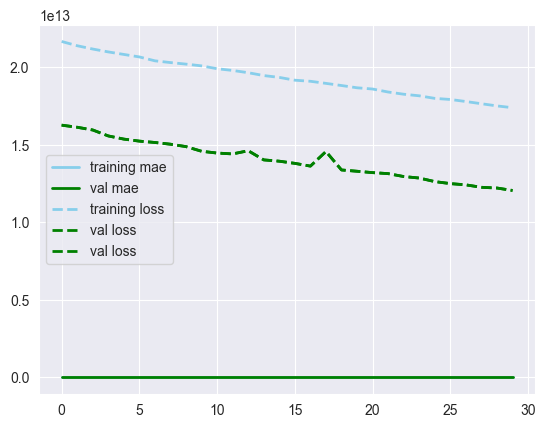

In [57]:
plt.plot( history.history['mae'], color='skyblue', linewidth=2, label='training mae')
plt.plot( history.history['val_mae'], color='green', linewidth=2, label='val mae')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.legend()

In [58]:
y_predicted = model_nn.predict(x_train)
mse = mean_squared_error(y_train,y_predicted)
mae = mean_absolute_error(y_train,y_predicted)
scores.append({
        'model': 'Neural Network',
        'best_score': r2_score(y_train, y_predicted),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
print('Traing Table')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))
pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

3078/3078 [==============================] - 2s 631us/step
Traing Table


,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.773672,3.825429e+13,2.549883e+06
1,RandomForestRegressor(),0.986263,2.321877e+12,3.958279e+05
2,DecisionTreeRegressor(),0.999937,1.066739e+10,4.840094e+03
3,XGBRegressor,0.960382,6.696318e+12,1.025558e+06
4,LightGBM Regressor,0.922692,1.306668e+13,1.174089e+06
5,Neural Network,0.899370,1.700869e+13,1.462143e+06


**Testing Data**

In [142]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
res_clmns = ['LR', 'RFR', 'DTR', 'XGB', 'LGBM', 'NN']
def model_test(x_test,y_test):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
  scores = []
  
  test_results = pd.DataFrame()
  test_results['test_data'] = y_test
  for j, i in enumerate(all_models):
    model = i
    model.fit(x_test,y_test)
    y_predicted = model.predict(x_test)
    test_results[res_clmns[j]] = y_predicted
    mse = mean_squared_error(y_test,y_predicted)
    mae = mean_absolute_error(y_test,y_predicted)
    scores.append({
        'model': i,
        'best_score': model.score(x_test,y_test),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
        })
  return scores, test_results

scores, test_results = model_test(x_test,y_test)
print('Testing is finished!')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))

Testing is finished!


In [143]:
y_predicted = model_xgb.predict(x_test)
test_results['XGB'] = y_predicted
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
scores.append({
        'model': 'XGBRegressor',
        'best_score': model_xgb.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })

y_predicted = model_lgb.predict(x_test)
test_results['LGBM'] = y_predicted
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
scores.append({
        'model': 'LightGBM Regressor',
        'best_score': model_lgb.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })

y_predicted = model_nn.predict(x_test)
test_results['NN'] = y_predicted
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
scores.append({
        'model': 'Neural Network',
        'best_score': r2_score(y_test, y_predicted),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
print('Test Table')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))
pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

1320/1320 [==============================] - 1s 631us/step
Test Table


,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.787120,3.839688e+13,2.616468e+06
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.986976,2.349208e+12,4.272499e+05
2,DecisionTreeRegressor(),0.999975,4.534629e+09,2.654715e+03
3,XGBRegressor,0.906725,1.682386e+13,1.186704e+06
4,LightGBM Regressor,0.889648,1.990409e+13,1.251615e+06
5,Neural Network,0.860760,2.511452e+13,1.699363e+06


In [233]:
scores[1]['model']= 'RFR'
scores

[{'model': LinearRegression(),
  'best_score': 0.7871201439366289,
  'mean_squared_error': 38396875907983.95,
  'mean_absolute_error': 2616467.975005923},
 {'model': 'RFR',
  'best_score': 0.9869755261824569,
  'mean_squared_error': 2349208206858.796,
  'mean_absolute_error': 427249.9307089868},
 {'model': DecisionTreeRegressor(),
  'best_score': 0.9999748591225168,
  'mean_squared_error': 4534628925.398617,
  'mean_absolute_error': 2654.7146610529694},
 {'model': 'XGBRegressor',
  'best_score': 0.9067252209362185,
  'mean_squared_error': 16823856344540.611,
  'mean_absolute_error': 1186703.54806993},
 {'model': 'LightGBM Regressor',
  'best_score': 0.8896478221289247,
  'mean_squared_error': 19904085610759.285,
  'mean_absolute_error': 1251614.7971270399},
 {'model': 'Neural Network',
  'best_score': 0.8607601693993161,
  'mean_squared_error': 25114515745593.297,
  'mean_absolute_error': 1699363.148279066}]

In [325]:
# res_clmns = []
# res_clmns = ['LR', 'RFR', 'DTR']
tb = scores

lst = { l[0]:'LR',
        l[1]:'RFR',
        l[2]:'DTR',
        l[3]:'XGB',
        l[4]:'LGBM',
        l[5]:'NN'
     }
lst

tb[1]['model']= 'RFR'

tb = pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])
tb.rename(columns = {'model':'Model', 'best_score':'R2', 'mean_squared_error':'MSE', 'mean_absolute_error':'MAE'}, inplace = True)
tb['Model'].replace(lst, inplace=True)
tb

,Model,R2,MSE,MAE
0,LR,0.787120,3.839688e+13,2.616468e+06
1,RFR,0.986976,2.349208e+12,4.272499e+05
2,DTR,0.999975,4.534629e+09,2.654715e+03
3,XGB,0.906725,1.682386e+13,1.186704e+06
4,LGBM,0.889648,1.990409e+13,1.251615e+06
5,NN,0.860760,2.511452e+13,1.699363e+06


In [326]:
#headerbool or list of str, default True
tab_name='results'
format_mapping = {"R2": '{:.5f}'.format}
tb = tb.style.format(format_mapping).hide(axis="index")

# with open(f'{tab_name}.tex', 'w') as file:
#     file.write(tb.to_latex(
#         # index = False,
#         caption = 'Results',
#         label = 'tab:results',
#         # escape = False,
#         column_format= '|c|c|c|c|c')
#     )

# tb.to_latex(tb)

print(tb.to_latex(
    caption = 'Results',
    label = 'tab:results',
    # escape = False,
    column_format= '|c|c|c|c|c')
    )

\begin{table}
\caption{Results}
\label{tab:results}
\begin{tabular}{|c|c|c|c|c}
Model & R2 & MSE & MAE \\
LR & 0.78712 & 38396875907983.953125 & 2616467.975006 \\
RFR & 0.98698 & 2349208206858.795898 & 427249.930709 \\
DTR & 0.99997 & 4534628925.398617 & 2654.714661 \\
XGB & 0.90673 & 16823856344540.611328 & 1186703.548070 \\
LGBM & 0.88965 & 19904085610759.285156 & 1251614.797127 \\
NN & 0.86076 & 25114515745593.296875 & 1699363.148279 \\
\end{tabular}
\end{table}



In [311]:
print(tb.to_latex())

\begin{tabular}{lrrr}
Model & R2 & MSE & MAE \\
LR & 0.78712 & 38396875907983.953125 & 2616467.975006 \\
RFR & 0.98698 & 2349208206858.795898 & 427249.930709 \\
DTR & 0.99997 & 4534628925.398617 & 2654.714661 \\
XGB & 0.90673 & 16823856344540.611328 & 1186703.548070 \\
LGBM & 0.88965 & 19904085610759.285156 & 1251614.797127 \\
NN & 0.86076 & 25114515745593.296875 & 1699363.148279 \\
\end{tabular}



In [1]:
# df_new.head(10)

NameError: name 'df_new' is not defined

In [284]:
tb.to_latex(
    index=True,
    caption = 'Results',
    label = 'tab:results',
    # escape = False,
    column_format= '|c|c|c|c|c')


RangeIndex(start=0, stop=6, step=1)

Text(0, 0.5, 'Predicted')

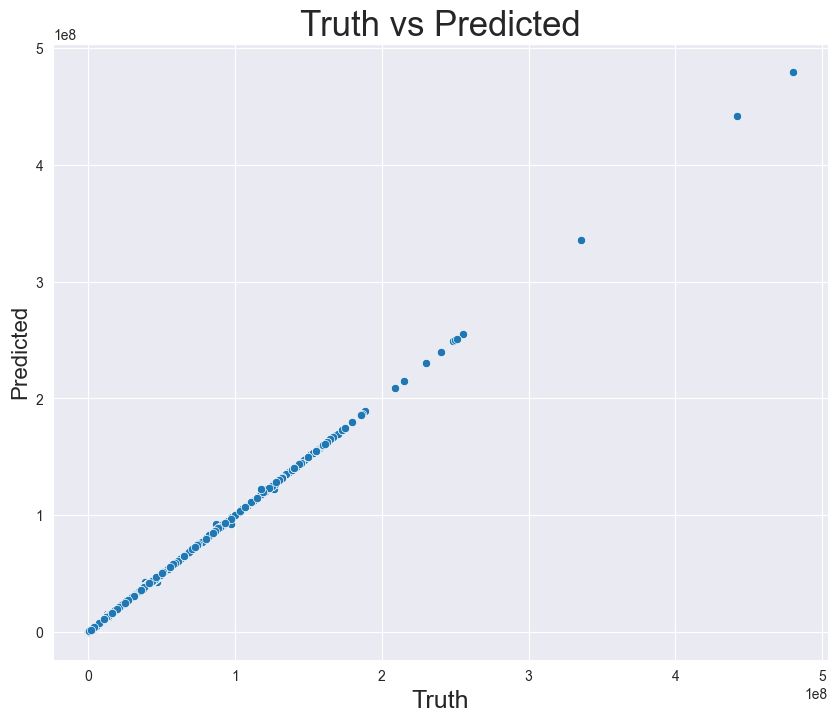

In [73]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title('Truth vs Predicted',fontsize=25)
sns.scatterplot(x = y_test,y = y_predicted)      
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)   

In [93]:
for mod in res_clmns:
    test_results[mod + '_error, %'] = (test_results['test_data'] - test_results[mod]) / test_results['test_data'] * 100 
test_results = test_results.sort_values(['DTR_error, %'])

test_results.head(20) 

,test_data,LR,RFR,DTR,XGB,LGBM,NN,"LR_error, %","RFR_error, %","DTR_error, %"
106499,1000000.0,-125184.0,1.486833e+06,1.500000e+06,3.722166e+06,3.751399e+06,2.710880e+06,112.518400,-48.683333,-50.000000
107590,2500000.0,2502912.0,3.172500e+06,3.250000e+06,3.681099e+06,3.694418e+06,3.142874e+06,-0.116480,-26.900000,-30.000000
96456,11145000.0,13759488.0,1.306155e+07,1.305331e+07,1.952155e+06,1.901830e+06,1.874502e+06,-23.458843,-17.196542,-17.122545
79939,13028000.0,11973888.0,1.510177e+07,1.516400e+07,1.175636e+07,1.087915e+07,1.297905e+07,8.091127,-15.917824,-16.395456
62234,11145000.0,14506496.0,1.303521e+07,1.278700e+07,2.291212e+06,2.163524e+06,2.056749e+06,-30.161472,-16.960203,-14.733064
61736,11509000.0,13759488.0,1.306155e+07,1.305331e+07,5.348120e+06,4.886558e+06,4.629222e+06,-19.554158,-13.489918,-13.418261
85680,11509000.0,13759488.0,1.306155e+07,1.305331e+07,2.855303e+06,2.985239e+06,2.046466e+06,-19.554158,-13.489918,-13.418261
82510,11509000.0,13759488.0,1.306155e+07,1.305331e+07,1.697755e+07,1.610054e+07,1.469502e+07,-19.554158,-13.489918,-13.418261
59342,11509000.0,13759488.0,1.306155e+07,1.305331e+07,3.004642e+06,2.533157e+06,2.077409e+06,-19.554158,-13.489918,-13.418261
84407,11509000.0,13759488.0,1.306155e+07,1.305331e+07,1.325075e+07,1.540231e+07,1.691627e+07,-19.554158,-13.489918,-13.418261


In [94]:
test_results.tail(20) 

,test_data,LR,RFR,DTR,XGB,LGBM,NN,"LR_error, %","RFR_error, %","DTR_error, %"
89433,14101000.0,14395392.0,1.331284e+07,1.328944e+07,1.161602e+06,1.144853e+06,1.242461e+06,-2.087738,5.589370,5.755354
82767,14101000.0,14395392.0,1.331284e+07,1.328944e+07,6.111693e+06,5.806457e+06,5.811892e+06,-2.087738,5.589370,5.755354
72804,14603000.0,16239360.0,1.382040e+07,1.371400e+07,6.504498e+06,6.594501e+06,6.261866e+06,-11.205643,5.359144,6.087790
126540,16090000.0,17108992.0,1.499767e+07,1.497016e+07,1.472046e+07,1.458370e+07,1.412675e+07,-6.333076,6.788879,6.959851
92698,15017000.0,15380992.0,1.394621e+07,1.396910e+07,4.735515e+06,4.319407e+06,3.388418e+06,-2.423866,7.130517,6.978091
98148,15017000.0,15380992.0,1.394621e+07,1.396910e+07,1.152776e+06,1.222418e+06,1.322206e+06,-2.423866,7.130517,6.978091
89253,16839000.0,11447296.0,1.564861e+07,1.562679e+07,2.825784e+06,2.536087e+06,2.551688e+06,32.019146,7.069217,7.198850
12621,47000000.0,13887744.0,4.315790e+07,4.300000e+07,4.668690e+06,4.522462e+06,5.665544e+06,70.451609,8.174681,8.510638
118071,900000.0,88832.0,7.944889e+05,8.150000e+05,2.867201e+06,2.583835e+06,2.017475e+06,90.129778,11.723457,9.444444
59208,14429000.0,13759488.0,1.306155e+07,1.305331e+07,1.204913e+06,1.304939e+06,1.236652e+06,4.640044,9.477063,9.534218


**5.Conclusion**

*   The model which has performed better is Decision Tree Rregressor
*   The model has performed well in training and testing data




In [74]:
car_model = 'Toyota Land Cruiser'
df_model = x_train[x_train[car_model]==1]
df_model = df_model[['year_f1', 'run_f15', 'engine_volume_f8']]
df_model['price_f9'] = y_train
print(df_model.head(20))

        year_f1   run_f15  engine_volume_f8    price_f9
28153    0.2000  0.061881          0.516854  14500000.0
18981    0.2250  0.051237          0.516854   9800000.0
131067   0.0750  0.014527          0.505618  45000000.0
18023    0.1875  0.064356          0.516854  18300000.0
123668   0.1250  0.042079          0.505618  25000000.0
138016   0.0250  0.014356          0.505618  50400000.0
3170     0.1875  0.048371          0.629213  21000000.0
16096    0.3000  0.084158          0.516854   6995000.0
20730    0.1875  0.056930          0.494382  16000000.0
21962    0.0250  0.011138          0.382022  68000000.0
8854     0.3000  0.017326          0.471910  18000000.0
3300     0.1875  0.040841          0.516854  25000000.0
139567   0.2250  0.041990          0.494382  10500000.0
17273    0.1125  0.038614          0.505618  28000000.0
45220    0.1875  0.060148          0.438202  17500000.0
6545     0.2000  0.104208          0.516854  10990000.0
125186   0.0500  0.041990          0.505618  530

In [75]:
print(df_model.describe())

           year_f1      run_f15  engine_volume_f8      price_f9
count  1079.000000  1079.000000       1079.000000  1.079000e+03
mean      0.144451     0.042040          0.481751  2.945363e+07
std       0.089747     0.025956          0.047121  2.041785e+07
min       0.000000     0.000000          0.325843  1.500000e+06
25%       0.075000     0.026856          0.438202  1.450000e+07
50%       0.137500     0.041990          0.505618  2.320000e+07
75%       0.200000     0.053094          0.516854  4.150000e+07
max       0.437500     0.188481          0.629213  9.500000e+07


In [83]:
df_model_pr = pd.DataFrame()
y_predicted.shape

(42210,)

In [84]:
df_model_pr = x_test
df_model_pr['price_f9'] = y_predicted
df_model_pr = df_model_pr[df_model_pr[car_model]==1]
# df_model_pr = df_model_pr[['price_f9','year_f1', 'run_f15', 'engine_volume_f8']]
# df_model_pr['price_f9'] = y_predicted
# print(df_model_pr.head(20))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Automatic legend placement (loc='best') not implemented for figure legend

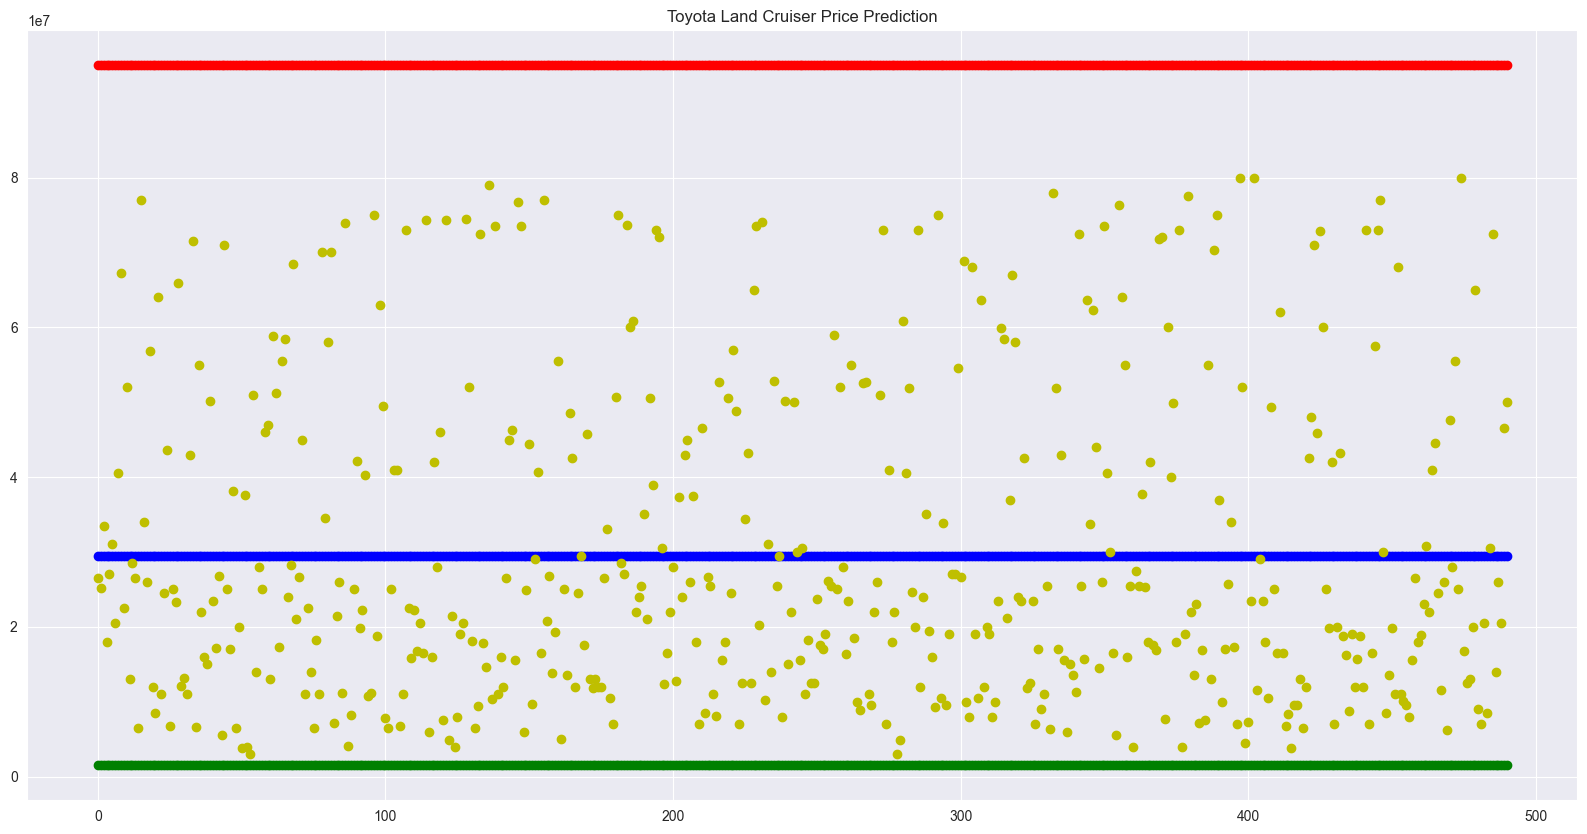

In [85]:
df_model_pr['mean_price'] = df_model['price_f9'].mean()
df_model_pr['min_price'] = df_model['price_f9'].min()
df_model_pr['max_price'] = df_model['price_f9'].max()
# print(df_model_pr.head(20))
df_model_pr.sort_values(['price_f9'])#.reset_index()
df_model_pr['ind'] = [i for i in range(df_model_pr.shape[0])]

# df_model_pr.plot(x='ind', y=['mean_price', 'min_price', 'max_price', 'price_f9'])
# df_model_pr.plot(x='ind', y=['price_f9'], kind='scatter')
# plt.figure(figsize=(20,10))
# plt.subplot(1,3,1)
# sns.jointplot()
# sns.lineplot(x='ind', y=['mean_price', 'min_price', 'max_price'])
# sns.scatterplot(x=df_num.year_f1,y=df_num.price_f9)
color = c = ['b', 'g', 'r', 'y']
# rgb = np.random.rand(1892, 3)
fig, ax = plt.subplots()
ax.set_title(car_model + ' Price Prediction')     #  заголовок для Axes

fig.set_figwidth(20)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"
# ax.legend(handles=(),
    # labels=('mean_price', 'min_price', 'max_price', 'price_f9'), loc='best')
for i, cln in enumerate(['mean_price', 'min_price', 'max_price', 'price_f9']):
    ax.scatter(df_model_pr['ind'], df_model_pr[cln], c=color[i])#, s = 10, c = rgb, alpha = 0.75)  
fig.legend(loc = 'best')
plt.show()
# ax.scatter(df_model_pr[['ind', 'ind', 'ind', 'ind']], df_model_pr[['mean_price', 'min_price', 'max_price', 'price_f9']])#, s = 10, c = rgb, alpha = 0.75а)

In [104]:
# df_new['av_prise_f17']
df_avprice = df_new['av_prise_f17']
df_avprice['y_pred'] = y_predicted
# df_num.shape

TypeError: no numeric data to plot

In [106]:
y_predicted

array([4500000., 3000000., 2650000., ..., 3900000.,  599999., 1850000.])

In [71]:
df = df_new.iloc[0:3,:3]


print(df.to_latex(
    caption = 'Results',
    label = 'tab:results',
    # escape = False,
    column_format= '|c|c|c|c|c')
    )

\begin{table}
\centering
\caption{Results}
\label{tab:results}
\begin{tabular}{|c|c|c|c|c}
\toprule
{} &         id &      model\_f5 &           city\_f4 \\
\midrule
0 &  148064435 &     Hummer H3 &            Алматы \\
1 &  148064495 &  Nissan Sunny &  Усть-Каменогорск \\
2 &  148064274 &  Toyota Camry &            Алматы \\
\bottomrule
\end{tabular}
\end{table}

